In [10]:
import numpy as np
import pandas as pd
from pathlib import Path
from keras.preprocessing import image
import glob

In [39]:
train_data = pd.read_csv('train.csv')

In [21]:
image_data = []

In [22]:
for img_path in train_data['ImageId'] :
    path = './Images/'+img_path
    p = Path(path)
    img = image.load_img(p,target_size=(100,100))
    img_array = image.img_to_array(img)
    image_data.append(img_array)
    

C:\Users\shubh\anaconda3\lib\site-packages\PIL\Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [23]:
print(len(image_data))

304


In [24]:
image_data = np.array(image_data,dtype='float')/255.0

In [25]:
labels = np.array(train_data['NameOfPokemon'])
print(image_data.shape)
print(labels.shape)

(304, 100, 100, 3)
(304,)


In [26]:
import random 
combined = list(zip(image_data,labels))
random.shuffle(combined)
image_data[:],labels[:] = zip(*combined)

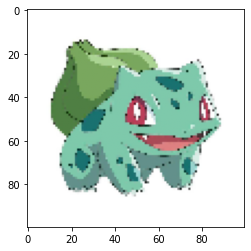

In [27]:
import matplotlib.pyplot as plt

def drawImg(img) :
    plt.imshow(img)
    
drawImg(image_data[5])


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [29]:
param_grid = {'C': [0.1, 0.2, 0.5, 1, 1.5, 2, 3, 5],
              'kernel': ['linear','rbf','poly','sigmoid']} 

In [30]:
gs = GridSearchCV(estimator=svm.SVC(),param_grid=param_grid,scoring='accuracy',cv=5,n_jobs=12)

In [32]:
M = image_data.shape[0]
image_data = image_data.reshape(M,-1)
print(image_data.shape)

(304, 30000)


In [33]:
gs.fit(image_data,labels)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=12,
             param_grid={'C': [0.1, 0.2, 0.5, 1, 1.5, 2, 3, 5],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [34]:
gs.best_estimator_

SVC(C=1)

In [35]:
gs.best_params_

{'C': 1, 'kernel': 'rbf'}

In [36]:
gs.best_score_

0.5029508196721312

In [46]:
svm_classifier = svm.SVC(kernel='linear',C=1.0)
svm_classifier.fit(image_data,labels)
svm_classifier.score(image_data,labels)

0.6776315789473685

In [54]:
svm_classifier = svm.SVC(kernel='rbf',C=1.0)
svm_classifier.fit(image_data,labels)
svm_classifier.score(image_data,labels)

0.6644736842105263

In [40]:
test_data = pd.read_csv('test.csv')

In [41]:
test_image_data = []

In [42]:
for img_path in test_data['ImageId'] :
    path = './Images/'+img_path
    p = Path(path)
    img = image.load_img(p,target_size=(100,100))
    img_array = image.img_to_array(img)
    test_image_data.append(img_array)

In [43]:
test_image_data = np.array(test_image_data,dtype='float')/255.0

In [44]:
M = test_image_data.shape[0]
test_image_data = test_image_data.reshape(M,-1)
print(test_image_data.shape)

(123, 30000)


In [55]:
pred = svm_classifier.predict(test_image_data)

In [48]:
pred

array(['Bulbasaur', 'Charmander', 'Bulbasaur', 'Charmander', 'Charmander',
       'Pikachu', 'Charmander', 'Bulbasaur', 'Bulbasaur', 'Charmander',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Charmander',
       'Bulbasaur', 'Charmander', 'Charmander', 'Charmander',
       'Charmander', 'Pikachu', 'Bulbasaur', 'Charmander', 'Bulbasaur',
       'Charmander', 'Charmander', 'Bulbasaur', 'Bulbasaur', 'Pikachu',
       'Pikachu', 'Pikachu', 'Pikachu', 'Charmander', 'Bulbasaur',
       'Pikachu', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Charmander',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Charmander', 'Charmander',
       'Charmander', 'Bulbasaur', 'Charmander', 'Bulbasaur', 'Pikachu',
       'Bulbasaur', 'Pikachu', 'Charmander', 'Bulbasaur', 'Bulbasaur',
       'Charmander', 'Bulbasaur', 'Charmander', 'Pikachu', 'Charmander',
       'Charmander', 'Pikachu', 'Charmander', 'Pikachu', 'Bulbasaur',
       'Charmander', 'Charmander', 'Bulbasaur', 'Pikachu', 'Pikachu',
      

In [56]:
test_data['NameOfPokemon'] = pd.Series(pred)

In [52]:
test_data.info

<bound method DataFrame.info of       ImageId NameOfPokemon
0    1106.jpg     Bulbasaur
1    2236.jpg    Charmander
2    1131.jpg     Bulbasaur
3    2221.jpg    Charmander
4    2011.jpg    Charmander
..        ...           ...
118  1124.jpg     Bulbasaur
119  2014.jpg       Pikachu
120  2235.jpg    Charmander
121  1126.jpg     Bulbasaur
122  2021.jpg    Charmander

[123 rows x 2 columns]>

In [57]:
test_data.to_csv('OutputByRBFKernal.csv',index=False)